In [1]:
from vnpy.app.spread_trading.backtesting import BacktestingEngine, OptimizationSetting
from vnpy.app.spread_trading.strategies.statistical_arbitrage_strategy import (
    StatisticalArbitrageStrategy
)
from vnpy.app.spread_trading.strategies.bm_arbitrage_strategy import (
    BmArbitrageStrategy
)

from vnpy.app.spread_trading.strategies.basic_spread_strategy import (
    BasicSpreadStrategy
)
from vnpy.app.spread_trading.strategies.bm_basic_spread_strategy import (
    BmBasicSpreadStrategy
)
from vnpy.app.spread_trading.strategies.spread_statistical_arbitrage_strategy import (
    SpreadStatisticalArbitrageStrategy
)
from vnpy.app.spread_trading.strategies.bm_multi_basic_spread_strategy import (
    BmMultiBasicSpreadStrategy
)
from vnpy.app.spread_trading.strategies.bm_basic_date_spread_strategy import (
    BmBasicDateSpreadStrategy
)
from vnpy.app.spread_trading.strategies.bm_q_date_spread_strategy import (
    BmQDateSpreadStrategy
)
from vnpy.app.spread_trading.base import LegData, SpreadData
from datetime import datetime


In [2]:
spread = SpreadData(
    name="BM",
    legs=[LegData("XBTH20.BITMEX"), LegData("XBTZ19.BITMEX")],
    price_multipliers={"XBTH20.BITMEX": 1, "XBTZ19.BITMEX": -1},
    trading_multipliers={"XBTH20.BITMEX": 1, "XBTZ19.BITMEX": -1},
    active_symbol="XBTH20.BITMEX",
    inverse_contracts={"XBTH20.BITMEX": False, "XBTZ19.BITMEX": False}, # 正向
    min_volume=1
)

In [3]:
engine = BacktestingEngine()
engine.set_parameters(
    spread=spread,
    interval="1m",
    start=datetime(2019, 9, 13),
    end=datetime(2019, 12, 12),
    rate=0.00075,
    slippage=0.001,
    size=1,
    pricetick=0.2,
    capital=1_000_000,    
)

# engine.add_strategy(StatisticalArbitrageStrategy, {})
# engine.add_strategy(SpreadStatisticalArbitrageStrategy, {}) #添加boll 差价 判读开仓

# engine.add_strategy(BmArbitrageStrategy, {})
# engine.add_strategy(BasicSpreadStrategy , {})
# engine.add_strategy(BmBasicSpreadStrategy, {"short_price": 300, "cover_price" : 50}) # 只远期开空，近期开多 符合平仓条件后，平空 平多
# 只远期开空，近期开多 添添加最终平仓日期 符合平仓条件后，平空 平多
engine.add_strategy(BmQDateSpreadStrategy, {"short_price": 100, "cover_price" : 50, "end_date": "2019-12-27", "end_days": 1}) 

# engine.add_strategy(BmMultiBasicSpreadStrategy, {}) # 主动腿多空循环开仓
# engine.add_strategy(BmBasicDateSpreadStrategy, {"short_price": 100, "cover_price" : 50, "start_days" : 3, "end_days": 5, "max_pos" : 50})


2019-12-19 12:11:35.948577	开始加载历史数据
2019-12-19 12:11:59.943714	历史数据加载完成，数据量：129088
2019-12-19 12:12:00.000064	策略初始化完成
2019-12-19 12:12:00.000196	开始回放历史数据
 正常开仓时间 2019-09-23 00:00:00
 正常平仓时间 2019-09-23 00:10:00
 正常开仓时间 2019-09-25 03:00:00
 正常平仓时间 2019-09-25 03:10:00
 正常开仓时间 2019-09-25 03:20:00
 正常平仓时间 2019-09-25 03:30:00
 正常开仓时间 2019-09-25 04:20:00
 正常平仓时间 2019-09-25 05:00:00
 正常开仓时间 2019-09-25 06:40:00
 正常平仓时间 2019-09-25 07:50:00
 正常开仓时间 2019-09-25 12:20:00
 正常平仓时间 2019-09-25 20:20:00
 正常开仓时间 2019-10-04 06:10:00
 正常平仓时间 2019-10-09 16:30:00
 正常开仓时间 2019-10-16 01:10:00
 正常平仓时间 2019-10-23 20:40:00
 正常开仓时间 2019-10-23 20:50:00
 正常平仓时间 2019-10-26 08:40:00
 正常开仓时间 2019-10-26 09:00:00
 正常平仓时间 2019-10-26 21:00:00
 正常开仓时间 2019-11-21 23:00:00
 正常平仓时间 2019-11-21 23:10:00
 正常开仓时间 2019-11-22 18:30:00
 正常平仓时间 2019-11-22 19:30:00
 正常开仓时间 2019-11-23 18:10:00
 正常平仓时间 2019-11-26 12:50:00
2019-12-19 12:12:00.630012	历史数据回放结束
2019-12-19 12:12:00.630242	开始计算逐日盯市盈亏
2019-12-19 12:12:00.633570	逐日盯市盈亏计算完成
2019-1

/Users/wudi/github/sqt/vnpy1/vnpy/app/spread_trading/backtesting.py:375: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  max_drawdown_start = df["balance"][:max_drawdown_end].argmax()


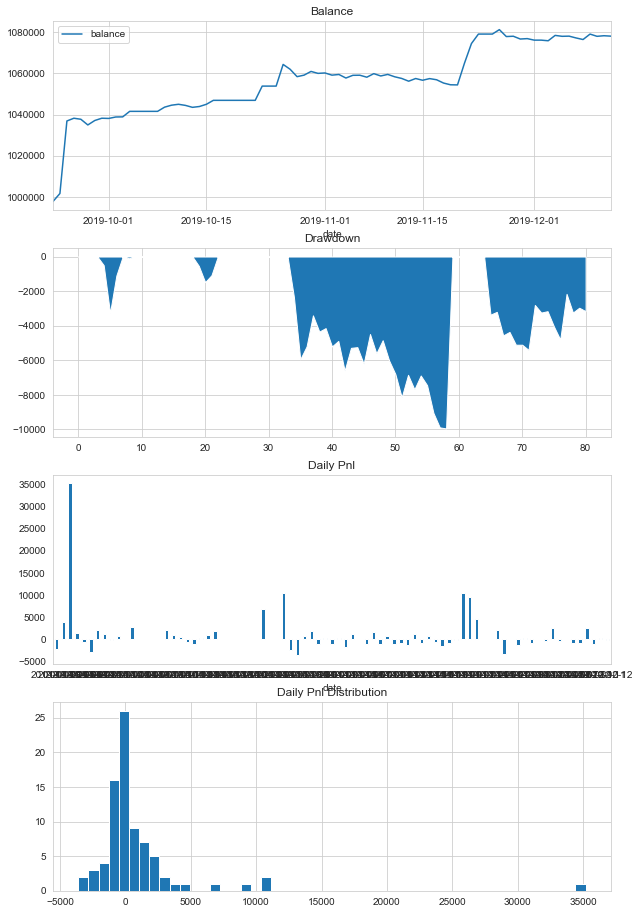

In [4]:
engine.load_data()
engine.run_backtesting()
df = engine.calculate_result()
engine.calculate_statistics()
engine.show_chart()

In [5]:
for trade in engine.trades.values():
    print(trade.orderid, trade.tradeid, trade.direction, trade.price, trade.volume, trade.time)
for trade in engine.trades.values():
    print(trade)

1 1 Direction.SHORT 143.0 100.0 2019-09-23 00:10:00
2 2 Direction.LONG 11.0 100.0 2019-09-25 03:06:00
3 3 Direction.SHORT 100.0 100.0 2019-09-25 03:16:00
4 4 Direction.LONG 42.4 100.0 2019-09-25 03:29:00
5 5 Direction.SHORT 106.0 100.0 2019-09-25 03:32:00
6 6 Direction.LONG 46.4 100.0 2019-09-25 04:25:00
7 7 Direction.SHORT 104.0 100.0 2019-09-25 05:06:00
8 8 Direction.LONG 46.0 100.0 2019-09-25 06:46:00
9 9 Direction.SHORT 100.0 100.0 2019-09-25 07:59:00
10 10 Direction.LONG 48.4 100.0 2019-09-25 12:23:00
11 11 Direction.SHORT 103.0 100.0 2019-09-25 20:22:00
12 12 Direction.LONG 45.6 100.0 2019-10-04 06:11:00
13 13 Direction.SHORT 102.0 100.0 2019-10-09 16:30:00
14 14 Direction.LONG 48.4 100.0 2019-10-16 01:13:00
15 15 Direction.SHORT 111.6 100.0 2019-10-23 20:41:00
16 16 Direction.LONG 42.4 100.0 2019-10-23 20:50:00
17 17 Direction.SHORT 110.0 100.0 2019-10-26 08:40:00
18 18 Direction.LONG 49.0 100.0 2019-10-26 09:07:00
19 19 Direction.SHORT 108.0 100.0 2019-10-26 21:00:00
20 20 Dire

In [6]:
setting = OptimizationSetting()


# setting.set_target("total_return")
# setting.set_target("sharpe_ratio")
setting.set_target("return_drawdown_ratio")
# setting.set_target("daily_net_pnl")



setting.add_parameter("cover_price", 0, 100, 10)
setting.add_parameter("short_price", 100, 300, 10)
setting.add_parameter("end_date", "2019-12-27")
print(setting.__dict__)
# setting.add_parameter("start_days", 0, 5, 1)
# setting.add_parameter("short_price", 0, 5, 1)


# setting.add_parameter("atr_ma_length", 10, 30, 1)

engine.run_ga_optimization(setting)
# engine.run_optimization(setting)

{'params': {'cover_price': [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'short_price': [100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300], 'end_date': ['2019-12-27']}, 'target_name': 'return_drawdown_ratio'}
2019-12-19 12:12:03.450539	参数优化空间：231
2019-12-19 12:12:03.450568	每代族群总数：100
2019-12-19 12:12:03.450583	优良筛选个数：80
2019-12-19 12:12:03.450597	迭代次数：30
2019-12-19 12:12:03.450614	交叉概率：95%
2019-12-19 12:12:03.450627	突变概率：5%
jksjkfjs  {'cover_price': 30, 'short_price': 250, 'end_date': '2019-12-27'}
2019-12-19 12:12:03.450799	开始加载历史数据
2019-12-19 12:12:03.450820	历史数据加载完成，数据量：129088
2019-12-19 12:12:03.520558	策略初始化完成
2019-12-19 12:12:03.520783	开始回放历史数据
 正常平仓时间 2019-09-23 00:00:00
 正常开仓时间 2019-09-25 03:00:00
 正常平仓时间 2019-09-25 03:40:00
 正常开仓时间 2019-09-25 04:20:00
2019-12-19 12:12:04.178478	历史数据回放结束
2019-12-19 12:12:04.178765	开始计算逐日盯市盈亏
2019-12-19 12:12:04.181345	逐日盯市盈亏计算完成
2019-12-19 12:12:04.181579	开始计算策略统计指标
jksjkfjs  {'cover_price':

/Users/wudi/github/sqt/vnpy1/vnpy/app/spread_trading/backtesting.py:375: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  max_drawdown_start = df["balance"][:max_drawdown_end].argmax()


2019-12-19 12:12:04.908286	历史数据回放结束
2019-12-19 12:12:04.908423	开始计算逐日盯市盈亏
2019-12-19 12:12:04.910533	逐日盯市盈亏计算完成
2019-12-19 12:12:04.910725	开始计算策略统计指标
jksjkfjs  {'cover_price': 80, 'short_price': 280, 'end_date': '2019-12-27'}
2019-12-19 12:12:04.917109	开始加载历史数据
2019-12-19 12:12:04.917134	历史数据加载完成，数据量：129088
2019-12-19 12:12:04.968069	策略初始化完成
2019-12-19 12:12:04.968219	开始回放历史数据
 正常开仓时间 2019-09-23 00:00:00


/Users/wudi/github/sqt/vnpy1/vnpy/app/spread_trading/backtesting.py:403: RuntimeWarning: divide by zero encountered in double_scalars
  return_drawdown_ratio = -total_return / max_ddpercent


2019-12-19 12:12:05.583231	历史数据回放结束
2019-12-19 12:12:05.583397	开始计算逐日盯市盈亏
2019-12-19 12:12:05.583433	成交记录为空，无法计算
2019-12-19 12:12:05.583447	开始计算策略统计指标
jksjkfjs  {'cover_price': 20, 'short_price': 200, 'end_date': '2019-12-27'}
2019-12-19 12:12:05.583624	开始加载历史数据
2019-12-19 12:12:05.583658	历史数据加载完成，数据量：129088
2019-12-19 12:12:05.641180	策略初始化完成
2019-12-19 12:12:05.641402	开始回放历史数据
 正常开仓时间 2019-09-23 00:00:00
 正常平仓时间 2019-09-23 22:20:00
 正常开仓时间 2019-09-25 03:00:00
 正常平仓时间 2019-09-25 03:40:00
 正常开仓时间 2019-09-25 04:20:00
2019-12-19 12:12:06.261462	历史数据回放结束
2019-12-19 12:12:06.261608	开始计算逐日盯市盈亏
2019-12-19 12:12:06.263803	逐日盯市盈亏计算完成
2019-12-19 12:12:06.264086	开始计算策略统计指标
jksjkfjs  {'cover_price': 20, 'short_price': 120, 'end_date': '2019-12-27'}
2019-12-19 12:12:06.270415	开始加载历史数据
2019-12-19 12:12:06.270440	历史数据加载完成，数据量：129088
2019-12-19 12:12:06.327083	策略初始化完成
2019-12-19 12:12:06.327233	开始回放历史数据
 正常开仓时间 2019-09-23 00:00:00
 正常平仓时间 2019-09-23 00:10:00
 正常开仓时间 2019-09-25 03:00:00
 正常平仓时间 2019-09

2019-12-19 12:12:15.143044	历史数据回放结束
2019-12-19 12:12:15.143190	开始计算逐日盯市盈亏
2019-12-19 12:12:15.145140	逐日盯市盈亏计算完成
2019-12-19 12:12:15.145389	开始计算策略统计指标
jksjkfjs  {'cover_price': 50, 'short_price': 120, 'end_date': '2019-12-27'}
2019-12-19 12:12:15.151243	开始加载历史数据
2019-12-19 12:12:15.151285	历史数据加载完成，数据量：129088
2019-12-19 12:12:15.201360	策略初始化完成
2019-12-19 12:12:15.201608	开始回放历史数据
 正常开仓时间 2019-09-23 00:00:00
 正常平仓时间 2019-09-23 00:10:00
 正常开仓时间 2019-09-25 03:00:00
 正常平仓时间 2019-09-25 03:40:00
 正常开仓时间 2019-09-25 04:20:00
 正常平仓时间 2019-09-25 08:00:00
 正常开仓时间 2019-09-25 12:20:00
 正常平仓时间 2019-09-26 05:30:00
 正常开仓时间 2019-10-04 06:10:00
 正常平仓时间 2019-10-28 22:10:00
 正常开仓时间 2019-11-21 23:00:00
 正常平仓时间 2019-11-21 23:20:00
 正常开仓时间 2019-11-22 18:30:00
 正常平仓时间 2019-11-27 20:00:00
2019-12-19 12:12:15.824010	历史数据回放结束
2019-12-19 12:12:15.824142	开始计算逐日盯市盈亏
2019-12-19 12:12:15.826163	逐日盯市盈亏计算完成
2019-12-19 12:12:15.826367	开始计算策略统计指标
jksjkfjs  {'cover_price': 10, 'short_price': 140, 'end_date': '2019-12-27'}
20

2019-12-19 12:12:25.379633	策略初始化完成
2019-12-19 12:12:25.379728	开始回放历史数据
 正常开仓时间 2019-09-23 00:00:00
 正常平仓时间 2019-09-23 12:00:00
 正常开仓时间 2019-09-25 03:00:00
 正常平仓时间 2019-09-25 03:40:00
 正常开仓时间 2019-09-25 04:20:00
 正常平仓时间 2019-11-19 02:20:00
 正常开仓时间 2019-11-22 18:30:00
2019-12-19 12:12:25.994436	历史数据回放结束
2019-12-19 12:12:25.994565	开始计算逐日盯市盈亏
2019-12-19 12:12:25.996727	逐日盯市盈亏计算完成
2019-12-19 12:12:25.996956	开始计算策略统计指标
jksjkfjs  {'cover_price': 20, 'short_price': 240, 'end_date': '2019-12-27'}
2019-12-19 12:12:26.004247	开始加载历史数据
2019-12-19 12:12:26.004309	历史数据加载完成，数据量：129088
2019-12-19 12:12:26.060451	策略初始化完成
2019-12-19 12:12:26.060546	开始回放历史数据
 正常开仓时间 2019-09-23 00:00:00
 正常平仓时间 2019-09-25 02:50:00
 正常开仓时间 2019-09-25 03:00:00
 正常平仓时间 2019-09-25 03:40:00
 正常开仓时间 2019-09-25 04:20:00
2019-12-19 12:12:26.680249	历史数据回放结束
2019-12-19 12:12:26.680390	开始计算逐日盯市盈亏
2019-12-19 12:12:26.682353	逐日盯市盈亏计算完成
2019-12-19 12:12:26.682579	开始计算策略统计指标
jksjkfjs  {'cover_price': 90, 'short_price': 250, 'end_date': '

2019-12-19 12:12:37.442263	历史数据回放结束
2019-12-19 12:12:37.442400	开始计算逐日盯市盈亏
2019-12-19 12:12:37.444464	逐日盯市盈亏计算完成
2019-12-19 12:12:37.444726	开始计算策略统计指标
jksjkfjs  {'cover_price': 0, 'short_price': 230, 'end_date': '2019-12-27'}
2019-12-19 12:12:37.451859	开始加载历史数据
2019-12-19 12:12:37.451925	历史数据加载完成，数据量：129088
2019-12-19 12:12:37.504017	策略初始化完成
2019-12-19 12:12:37.504197	开始回放历史数据
 正常开仓时间 2019-09-23 00:00:00
 正常平仓时间 2019-09-25 02:50:00
2019-12-19 12:12:38.109384	历史数据回放结束
2019-12-19 12:12:38.109509	开始计算逐日盯市盈亏
2019-12-19 12:12:38.111402	逐日盯市盈亏计算完成
2019-12-19 12:12:38.111661	开始计算策略统计指标
jksjkfjs  {'cover_price': 20, 'short_price': 280, 'end_date': '2019-12-27'}
2019-12-19 12:12:38.117648	开始加载历史数据
2019-12-19 12:12:38.117687	历史数据加载完成，数据量：129088
2019-12-19 12:12:38.175796	策略初始化完成
2019-12-19 12:12:38.175964	开始回放历史数据
 正常平仓时间 2019-09-23 00:00:00
 正常开仓时间 2019-09-25 03:00:00
2019-12-19 12:12:38.784688	历史数据回放结束
2019-12-19 12:12:38.784826	开始计算逐日盯市盈亏
2019-12-19 12:12:38.787347	逐日盯市盈亏计算完成
2019-12-19 12:12:

2019-12-19 12:12:48.267138	历史数据回放结束
2019-12-19 12:12:48.267278	开始计算逐日盯市盈亏
2019-12-19 12:12:48.267293	成交记录为空，无法计算
2019-12-19 12:12:48.267326	开始计算策略统计指标
jksjkfjs  {'cover_price': 100, 'short_price': 210, 'end_date': '2019-12-27'}
2019-12-19 12:12:48.267420	开始加载历史数据
2019-12-19 12:12:48.267440	历史数据加载完成，数据量：129088
2019-12-19 12:12:48.321586	策略初始化完成
2019-12-19 12:12:48.321788	开始回放历史数据
 正常开仓时间 2019-09-23 00:00:00
 正常平仓时间 2019-09-25 02:50:00
 正常开仓时间 2019-09-25 03:00:00
 正常平仓时间 2019-09-25 03:40:00
 正常开仓时间 2019-09-25 03:50:00
2019-12-19 12:12:48.929751	历史数据回放结束
2019-12-19 12:12:48.929913	开始计算逐日盯市盈亏
2019-12-19 12:12:48.931864	逐日盯市盈亏计算完成
2019-12-19 12:12:48.932274	开始计算策略统计指标
jksjkfjs  {'cover_price': 0, 'short_price': 130, 'end_date': '2019-12-27'}
2019-12-19 12:12:48.939519	开始加载历史数据
2019-12-19 12:12:48.939546	历史数据加载完成，数据量：129088
2019-12-19 12:12:48.990491	策略初始化完成
2019-12-19 12:12:48.990723	开始回放历史数据
 正常开仓时间 2019-09-23 00:00:00
 正常平仓时间 2019-09-23 00:10:00
2019-12-19 12:12:49.609256	历史数据回放结束
2019-12

2019-12-19 12:12:57.137686	历史数据回放结束
2019-12-19 12:12:57.137846	开始计算逐日盯市盈亏
2019-12-19 12:12:57.137861	成交记录为空，无法计算
2019-12-19 12:12:57.137873	开始计算策略统计指标
jksjkfjs  {'cover_price': 20, 'short_price': 260, 'end_date': '2019-12-27'}
2019-12-19 12:12:57.137942	开始加载历史数据
2019-12-19 12:12:57.137962	历史数据加载完成，数据量：129088
2019-12-19 12:12:57.191501	策略初始化完成
2019-12-19 12:12:57.191798	开始回放历史数据
 正常开仓时间 2019-09-23 00:00:00
 正常平仓时间 2019-09-25 02:50:00
 正常开仓时间 2019-09-25 03:00:00
 正常平仓时间 2019-09-25 03:40:00
 正常开仓时间 2019-09-25 04:20:00
2019-12-19 12:12:57.809356	历史数据回放结束
2019-12-19 12:12:57.809493	开始计算逐日盯市盈亏
2019-12-19 12:12:57.812156	逐日盯市盈亏计算完成
2019-12-19 12:12:57.812600	开始计算策略统计指标
gen	nevals	mean  	std  	min   	max           
0  	100   	[-inf]	[nan]	[-inf]	[992.80999775]
jksjkfjs  {'cover_price': 40, 'short_price': 170, 'end_date': '2019-12-27'}
2019-12-19 12:12:57.827873	开始加载历史数据
2019-12-19 12:12:57.827903	历史数据加载完成，数据量：129088
2019-12-19 12:12:57.882089	策略初始化完成
2019-12-19 12:12:57.882218	开始回放历史数据
 正常开仓时间

/Library/Python/3.7/site-packages/numpy/core/_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


 正常平仓时间 2019-11-19 02:10:00
 正常开仓时间 2019-11-22 18:30:00
2019-12-19 12:12:58.495064	历史数据回放结束
2019-12-19 12:12:58.495189	开始计算逐日盯市盈亏
2019-12-19 12:12:58.497391	逐日盯市盈亏计算完成
2019-12-19 12:12:58.497627	开始计算策略统计指标
jksjkfjs  {'cover_price': 50, 'short_price': 160, 'end_date': '2019-12-27'}
2019-12-19 12:12:58.503606	开始加载历史数据
2019-12-19 12:12:58.503643	历史数据加载完成，数据量：129088
2019-12-19 12:12:58.555322	策略初始化完成
2019-12-19 12:12:58.555760	开始回放历史数据
 正常开仓时间 2019-09-23 00:00:00
 正常平仓时间 2019-09-23 00:20:00
 正常开仓时间 2019-09-25 03:00:00
 正常平仓时间 2019-09-25 03:40:00
 正常开仓时间 2019-09-25 04:20:00
 正常平仓时间 2019-11-18 17:30:00
 正常开仓时间 2019-11-21 23:00:00
 正常平仓时间 2019-12-02 14:50:00
2019-12-19 12:12:59.168974	历史数据回放结束
2019-12-19 12:12:59.169097	开始计算逐日盯市盈亏
2019-12-19 12:12:59.171203	逐日盯市盈亏计算完成
2019-12-19 12:12:59.171476	开始计算策略统计指标
jksjkfjs  {'cover_price': 80, 'short_price': 140, 'end_date': '2019-12-27'}
2019-12-19 12:12:59.177749	开始加载历史数据
2019-12-19 12:12:59.177791	历史数据加载完成，数据量：129088
2019-12-19 12:12:59.235596	策略初始

2019-12-19 12:13:08.719489	历史数据回放结束
2019-12-19 12:13:08.719630	开始计算逐日盯市盈亏
2019-12-19 12:13:08.721616	逐日盯市盈亏计算完成
2019-12-19 12:13:08.721840	开始计算策略统计指标
jksjkfjs  {'cover_price': 90, 'short_price': 160, 'end_date': '2019-12-27'}
2019-12-19 12:13:08.728393	开始加载历史数据
2019-12-19 12:13:08.728418	历史数据加载完成，数据量：129088
2019-12-19 12:13:08.779627	策略初始化完成
2019-12-19 12:13:08.779782	开始回放历史数据
 正常开仓时间 2019-09-23 00:00:00
 正常平仓时间 2019-09-23 00:20:00
 正常开仓时间 2019-09-25 03:00:00
 正常平仓时间 2019-09-25 03:40:00
 正常开仓时间 2019-09-25 04:00:00
 正常平仓时间 2019-11-18 17:30:00
 正常开仓时间 2019-11-21 23:00:00
 正常平仓时间 2019-12-02 14:50:00
 正常开仓时间 2019-12-04 21:20:00
2019-12-19 12:13:09.393797	历史数据回放结束
2019-12-19 12:13:09.393919	开始计算逐日盯市盈亏
2019-12-19 12:13:09.395866	逐日盯市盈亏计算完成
2019-12-19 12:13:09.396069	开始计算策略统计指标
jksjkfjs  {'cover_price': 100, 'short_price': 140, 'end_date': '2019-12-27'}
2019-12-19 12:13:09.402153	开始加载历史数据
2019-12-19 12:13:09.402213	历史数据加载完成，数据量：129088
2019-12-19 12:13:09.454194	策略初始化完成
2019-12-19 12:13:09.454

 正常平仓时间 2019-10-29 06:00:00
2019-12-19 12:13:18.262724	历史数据回放结束
2019-12-19 12:13:18.262885	开始计算逐日盯市盈亏
2019-12-19 12:13:18.265295	逐日盯市盈亏计算完成
2019-12-19 12:13:18.265575	开始计算策略统计指标
jksjkfjs  {'cover_price': 60, 'short_price': 210, 'end_date': '2019-12-27'}
2019-12-19 12:13:18.272349	开始加载历史数据
2019-12-19 12:13:18.272374	历史数据加载完成，数据量：129088
2019-12-19 12:13:18.324349	策略初始化完成
2019-12-19 12:13:18.324522	开始回放历史数据
 正常平仓时间 2019-09-23 00:00:00
 正常开仓时间 2019-09-25 03:00:00
 正常平仓时间 2019-09-25 03:40:00
 正常开仓时间 2019-09-25 04:10:00
2019-12-19 12:13:18.934745	历史数据回放结束
2019-12-19 12:13:18.934884	开始计算逐日盯市盈亏
2019-12-19 12:13:18.937004	逐日盯市盈亏计算完成
2019-12-19 12:13:18.937170	开始计算策略统计指标
jksjkfjs  {'cover_price': 20, 'short_price': 130, 'end_date': '2019-12-27'}
2019-12-19 12:13:18.944784	开始加载历史数据
2019-12-19 12:13:18.944824	历史数据加载完成，数据量：129088
2019-12-19 12:13:18.996242	策略初始化完成
2019-12-19 12:13:18.996540	开始回放历史数据
 正常开仓时间 2019-09-23 00:00:00
 正常平仓时间 2019-09-23 00:10:00
 正常开仓时间 2019-09-25 03:00:00
 正常平仓时间 2019-09-

 正常开仓时间 2019-10-23 20:40:00
 正常平仓时间 2019-10-26 08:40:00
 正常开仓时间 2019-10-26 09:40:00
 正常平仓时间 2019-10-27 18:10:00
2019-12-19 12:13:25.135301	历史数据回放结束
2019-12-19 12:13:25.135508	开始计算逐日盯市盈亏
2019-12-19 12:13:25.137632	逐日盯市盈亏计算完成
2019-12-19 12:13:25.137887	开始计算策略统计指标
jksjkfjs  {'cover_price': 90, 'short_price': 100, 'end_date': '2019-12-27'}
2019-12-19 12:13:25.144606	开始加载历史数据
2019-12-19 12:13:25.144649	历史数据加载完成，数据量：129088
2019-12-19 12:13:25.198659	策略初始化完成
2019-12-19 12:13:25.198940	开始回放历史数据
 正常平仓时间 2019-09-23 00:00:00
 正常开仓时间 2019-09-25 03:00:00
 正常平仓时间 2019-09-25 03:10:00
 正常开仓时间 2019-09-25 03:20:00
 正常平仓时间 2019-09-25 03:30:00
 正常开仓时间 2019-09-25 03:40:00
 正常平仓时间 2019-09-25 03:50:00
 正常开仓时间 2019-09-25 04:00:00
 正常平仓时间 2019-09-25 04:10:00
 正常开仓时间 2019-09-25 04:20:00
 正常平仓时间 2019-09-25 05:00:00
 正常开仓时间 2019-09-25 05:10:00
 正常平仓时间 2019-09-25 05:30:00
 正常开仓时间 2019-09-25 05:40:00
 正常平仓时间 2019-09-25 05:50:00
 正常开仓时间 2019-09-25 06:00:00
 正常平仓时间 2019-09-25 06:10:00
 正常开仓时间 2019-09-25 06:30:00
 正常平

2019-12-19 12:13:26.572552	历史数据回放结束
2019-12-19 12:13:26.572699	开始计算逐日盯市盈亏
2019-12-19 12:13:26.574625	逐日盯市盈亏计算完成
2019-12-19 12:13:26.574844	开始计算策略统计指标
jksjkfjs  {'cover_price': 50, 'short_price': 130, 'end_date': '2019-12-27'}
2019-12-19 12:13:26.580753	开始加载历史数据
2019-12-19 12:13:26.580797	历史数据加载完成，数据量：129088
2019-12-19 12:13:26.639313	策略初始化完成
2019-12-19 12:13:26.639462	开始回放历史数据
 正常开仓时间 2019-09-23 00:00:00
 正常平仓时间 2019-09-23 00:10:00
 正常开仓时间 2019-09-25 03:00:00
 正常平仓时间 2019-09-25 03:40:00
 正常开仓时间 2019-09-25 04:20:00
 正常平仓时间 2019-09-26 21:30:00
 正常开仓时间 2019-10-04 06:10:00
 正常平仓时间 2019-10-28 22:50:00
 正常开仓时间 2019-11-21 23:00:00
 正常平仓时间 2019-11-21 23:20:00
 正常开仓时间 2019-11-22 18:30:00
 正常平仓时间 2019-11-30 19:10:00
2019-12-19 12:13:27.259695	历史数据回放结束
2019-12-19 12:13:27.259801	开始计算逐日盯市盈亏
2019-12-19 12:13:27.261876	逐日盯市盈亏计算完成
2019-12-19 12:13:27.262163	开始计算策略统计指标
jksjkfjs  {'cover_price': 90, 'short_price': 290, 'end_date': '2019-12-27'}
2019-12-19 12:13:27.268760	开始加载历史数据
2019-12-19 12:13:27.26

 正常平仓时间 2019-10-23 20:40:00
 正常开仓时间 2019-10-23 20:50:00
 正常平仓时间 2019-10-26 08:40:00
 正常开仓时间 2019-10-26 08:50:00
 正常平仓时间 2019-10-27 18:10:00
 正常开仓时间 2019-10-27 18:40:00
 正常平仓时间 2019-10-28 04:50:00
 正常开仓时间 2019-10-28 05:00:00
 正常平仓时间 2019-10-28 05:20:00
 正常开仓时间 2019-10-28 05:30:00
 正常平仓时间 2019-10-28 13:20:00
 正常开仓时间 2019-10-28 15:30:00
 正常平仓时间 2019-10-28 18:40:00
 正常开仓时间 2019-10-30 21:50:00
 正常平仓时间 2019-10-31 01:00:00
 正常开仓时间 2019-10-31 20:50:00
 正常平仓时间 2019-10-31 23:10:00
 正常开仓时间 2019-11-05 04:10:00
 正常平仓时间 2019-11-05 04:20:00
 正常开仓时间 2019-11-05 14:30:00
 正常平仓时间 2019-11-05 21:00:00
 正常开仓时间 2019-11-08 21:30:00
 正常平仓时间 2019-11-08 22:40:00
 正常开仓时间 2019-11-11 00:10:00
 正常平仓时间 2019-11-11 02:20:00
 正常开仓时间 2019-11-15 17:00:00
 正常平仓时间 2019-11-15 17:10:00
 正常开仓时间 2019-11-21 23:00:00
 正常平仓时间 2019-11-21 23:10:00
 正常开仓时间 2019-11-22 16:00:00
 正常平仓时间 2019-11-22 17:10:00
 正常开仓时间 2019-11-22 18:00:00
 正常平仓时间 2019-11-22 20:20:00
 正常开仓时间 2019-11-22 21:00:00
 正常平仓时间 2019-11-22 22:10:00
 正常开仓时间 2019-11-22 2

 正常平仓时间 2019-11-30 19:10:00
 正常开仓时间 2019-12-04 08:30:00
 正常平仓时间 2019-12-04 09:30:00
 正常开仓时间 2019-12-04 21:20:00
 正常平仓时间 2019-12-05 18:40:00
 正常开仓时间 2019-12-09 23:50:00
2019-12-19 12:13:41.521232	历史数据回放结束
2019-12-19 12:13:41.521469	开始计算逐日盯市盈亏
2019-12-19 12:13:41.523598	逐日盯市盈亏计算完成
2019-12-19 12:13:41.523729	开始计算策略统计指标
jksjkfjs  {'cover_price': 80, 'short_price': 260, 'end_date': '2019-12-27'}
2019-12-19 12:13:41.530966	开始加载历史数据
2019-12-19 12:13:41.531179	历史数据加载完成，数据量：129088
2019-12-19 12:13:41.585774	策略初始化完成
2019-12-19 12:13:41.585901	开始回放历史数据
 正常开仓时间 2019-09-23 00:00:00
 正常平仓时间 2019-09-25 02:50:00
 正常开仓时间 2019-09-25 03:00:00
 正常平仓时间 2019-09-25 03:40:00
 正常开仓时间 2019-09-25 04:00:00
2019-12-19 12:13:42.188372	历史数据回放结束
2019-12-19 12:13:42.188509	开始计算逐日盯市盈亏
2019-12-19 12:13:42.190723	逐日盯市盈亏计算完成
2019-12-19 12:13:42.190991	开始计算策略统计指标
jksjkfjs  {'cover_price': 100, 'short_price': 170, 'end_date': '2019-12-27'}
2019-12-19 12:13:42.197324	开始加载历史数据
2019-12-19 12:13:42.197350	历史数据加载完成，数据量：129088
20

 正常开仓时间 2019-11-21 23:00:00
 正常平仓时间 2019-11-21 23:10:00
 正常开仓时间 2019-11-22 15:30:00
 正常平仓时间 2019-11-22 17:10:00
 正常开仓时间 2019-11-22 17:20:00
 正常平仓时间 2019-11-22 17:40:00
 正常开仓时间 2019-11-22 17:50:00
 正常平仓时间 2019-11-22 20:20:00
 正常开仓时间 2019-11-22 20:30:00
 正常平仓时间 2019-11-22 22:10:00
 正常开仓时间 2019-11-22 22:20:00
 正常平仓时间 2019-11-27 13:50:00
 正常开仓时间 2019-11-27 14:10:00
 正常平仓时间 2019-11-27 15:50:00
 正常开仓时间 2019-11-27 16:20:00
 正常平仓时间 2019-11-27 20:00:00
 正常开仓时间 2019-11-28 06:20:00
 正常平仓时间 2019-11-28 06:30:00
 正常开仓时间 2019-11-29 06:50:00
 正常平仓时间 2019-11-29 11:10:00
 正常开仓时间 2019-11-29 11:20:00
 正常平仓时间 2019-11-29 11:50:00
 正常开仓时间 2019-11-29 12:00:00
 正常平仓时间 2019-11-29 14:50:00
 正常开仓时间 2019-11-29 17:20:00
 正常平仓时间 2019-11-29 17:30:00
 正常开仓时间 2019-11-29 17:40:00
 正常平仓时间 2019-11-29 21:50:00
 正常开仓时间 2019-11-30 05:40:00
 正常平仓时间 2019-11-30 06:40:00
 正常开仓时间 2019-11-30 06:50:00
 正常平仓时间 2019-11-30 07:40:00
 正常开仓时间 2019-12-04 08:30:00
 正常平仓时间 2019-12-04 08:40:00
 正常开仓时间 2019-12-04 21:20:00
 正常平仓时间 2019-12-04 2

 正常平仓时间 2019-10-03 22:20:00
 正常开仓时间 2019-10-03 22:30:00
 正常平仓时间 2019-10-09 16:30:00
 正常开仓时间 2019-10-09 16:40:00
 正常平仓时间 2019-10-09 18:40:00
 正常开仓时间 2019-10-09 18:50:00
 正常平仓时间 2019-10-09 19:00:00
 正常开仓时间 2019-10-09 19:10:00
 正常平仓时间 2019-10-09 20:10:00
 正常开仓时间 2019-10-09 20:20:00
 正常平仓时间 2019-10-10 13:40:00
 正常开仓时间 2019-10-10 13:50:00
 正常平仓时间 2019-10-11 12:50:00
 正常开仓时间 2019-10-11 13:00:00
 正常平仓时间 2019-10-23 20:40:00
 正常开仓时间 2019-10-23 20:50:00
 正常平仓时间 2019-10-26 08:40:00
 正常开仓时间 2019-10-26 08:50:00
 正常平仓时间 2019-10-26 21:00:00
 正常开仓时间 2019-10-26 21:10:00
 正常平仓时间 2019-10-27 02:50:00
 正常开仓时间 2019-10-27 03:00:00
 正常平仓时间 2019-10-27 16:40:00
 正常开仓时间 2019-10-27 16:50:00
 正常平仓时间 2019-10-27 17:10:00
 正常开仓时间 2019-10-27 17:20:00
 正常平仓时间 2019-10-27 17:30:00
 正常开仓时间 2019-10-27 17:40:00
 正常平仓时间 2019-10-27 17:50:00
 正常开仓时间 2019-10-27 18:00:00
 正常平仓时间 2019-10-27 18:10:00
 正常开仓时间 2019-10-27 18:20:00
 正常平仓时间 2019-10-27 18:30:00
 正常开仓时间 2019-10-27 18:40:00
 正常平仓时间 2019-10-27 18:50:00
 正常开仓时间 2019-10-27 1

 正常平仓时间 2019-11-26 12:50:00
 正常开仓时间 2019-11-26 13:00:00
 正常平仓时间 2019-11-26 13:10:00
 正常开仓时间 2019-11-26 13:20:00
 正常平仓时间 2019-11-26 13:30:00
 正常开仓时间 2019-11-26 13:40:00
 正常平仓时间 2019-11-26 13:50:00
 正常开仓时间 2019-11-26 14:00:00
 正常平仓时间 2019-11-26 14:20:00
 正常开仓时间 2019-11-26 14:30:00
 正常平仓时间 2019-11-26 14:50:00
 正常开仓时间 2019-11-26 15:00:00
 正常平仓时间 2019-11-26 15:10:00
 正常开仓时间 2019-11-26 15:20:00
 正常平仓时间 2019-11-26 15:40:00
 正常开仓时间 2019-11-26 15:50:00
 正常平仓时间 2019-11-26 16:00:00
 正常开仓时间 2019-11-26 16:10:00
 正常平仓时间 2019-11-26 16:20:00
 正常开仓时间 2019-11-26 16:30:00
 正常平仓时间 2019-11-26 16:40:00
 正常开仓时间 2019-11-26 16:50:00
 正常平仓时间 2019-11-26 17:10:00
 正常开仓时间 2019-11-26 17:20:00
 正常平仓时间 2019-11-26 17:30:00
 正常开仓时间 2019-11-26 17:40:00
 正常平仓时间 2019-11-26 20:00:00
 正常开仓时间 2019-11-26 20:10:00
 正常平仓时间 2019-11-27 13:30:00
 正常开仓时间 2019-11-27 13:40:00
 正常平仓时间 2019-11-27 13:50:00
 正常开仓时间 2019-11-27 14:10:00
 正常平仓时间 2019-11-27 14:20:00
 正常开仓时间 2019-11-27 14:30:00
 正常平仓时间 2019-11-27 14:40:00
 正常开仓时间 2019-11-27 1

 正常平仓时间 2019-10-03 22:20:00
 正常开仓时间 2019-10-03 22:30:00
 正常平仓时间 2019-10-23 20:40:00
 正常开仓时间 2019-10-23 20:50:00
 正常平仓时间 2019-10-26 08:40:00
 正常开仓时间 2019-10-26 08:50:00
 正常平仓时间 2019-10-27 18:10:00
 正常开仓时间 2019-10-27 21:20:00
 正常平仓时间 2019-10-28 04:50:00
 正常开仓时间 2019-10-28 09:20:00
 正常平仓时间 2019-10-28 13:20:00
 正常开仓时间 2019-11-21 23:00:00
 正常平仓时间 2019-11-21 23:10:00
 正常开仓时间 2019-11-22 18:00:00
 正常平仓时间 2019-11-22 20:20:00
 正常开仓时间 2019-11-23 00:40:00
 正常平仓时间 2019-11-27 13:50:00
2019-12-19 12:13:51.297897	历史数据回放结束
2019-12-19 12:13:51.298025	开始计算逐日盯市盈亏
2019-12-19 12:13:51.300059	逐日盯市盈亏计算完成
2019-12-19 12:13:51.300265	开始计算策略统计指标
jksjkfjs  {'cover_price': 100, 'short_price': 120, 'end_date': '2019-12-27'}
2019-12-19 12:13:51.306398	开始加载历史数据
2019-12-19 12:13:51.306442	历史数据加载完成，数据量：129088
2019-12-19 12:13:51.360213	策略初始化完成
2019-12-19 12:13:51.360405	开始回放历史数据
 正常平仓时间 2019-09-23 00:00:00
 正常开仓时间 2019-09-25 03:00:00
 正常平仓时间 2019-09-25 03:40:00
 正常开仓时间 2019-09-25 03:50:00
 正常平仓时间 2019-09-25 04:00:00
 正常

2019-12-19 12:13:58.678899	历史数据回放结束
2019-12-19 12:13:58.679108	开始计算逐日盯市盈亏
2019-12-19 12:13:58.679150	成交记录为空，无法计算
2019-12-19 12:13:58.679163	开始计算策略统计指标
jksjkfjs  {'cover_price': 30, 'short_price': 270, 'end_date': '2019-12-27'}
2019-12-19 12:13:58.679304	开始加载历史数据
2019-12-19 12:13:58.679324	历史数据加载完成，数据量：129088
2019-12-19 12:13:58.732175	策略初始化完成
2019-12-19 12:13:58.732311	开始回放历史数据
 正常开仓时间 2019-09-23 00:00:00
 正常平仓时间 2019-09-25 03:40:00
 正常开仓时间 2019-09-25 04:20:00
2019-12-19 12:13:59.342808	历史数据回放结束
2019-12-19 12:13:59.342947	开始计算逐日盯市盈亏
2019-12-19 12:13:59.345230	逐日盯市盈亏计算完成
2019-12-19 12:13:59.345676	开始计算策略统计指标
9  	100   	[981.27152589]	[44.68830934] 	[808.19444804]	[992.80999775]
jksjkfjs  {'cover_price': 80, 'short_price': 230, 'end_date': '2019-12-27'}
2019-12-19 12:13:59.361993	开始加载历史数据
2019-12-19 12:13:59.362034	历史数据加载完成，数据量：129088
2019-12-19 12:13:59.417911	策略初始化完成
2019-12-19 12:13:59.418082	开始回放历史数据
 正常开仓时间 2019-09-23 00:00:00
 正常平仓时间 2019-09-25 02:50:00
 正常开仓时间 2019-09-25 03:00:00


2019-12-19 12:14:09.333926	历史数据回放结束
2019-12-19 12:14:09.334063	开始计算逐日盯市盈亏
2019-12-19 12:14:09.336062	逐日盯市盈亏计算完成
2019-12-19 12:14:09.336365	开始计算策略统计指标
19 	100   	[992.80999775]	[0.]          	[992.80999775]	[992.80999775]
jksjkfjs  {'cover_price': 70, 'short_price': 240, 'end_date': '2019-12-27'}
2019-12-19 12:14:09.348614	开始加载历史数据
2019-12-19 12:14:09.348666	历史数据加载完成，数据量：129088
2019-12-19 12:14:09.400671	策略初始化完成
2019-12-19 12:14:09.400834	开始回放历史数据
 正常平仓时间 2019-09-23 00:00:00
 正常开仓时间 2019-09-25 03:00:00
 正常平仓时间 2019-09-25 03:40:00
 正常开仓时间 2019-09-25 04:10:00
2019-12-19 12:14:10.014387	历史数据回放结束
2019-12-19 12:14:10.014528	开始计算逐日盯市盈亏
2019-12-19 12:14:10.016601	逐日盯市盈亏计算完成
2019-12-19 12:14:10.016831	开始计算策略统计指标
20 	100   	[992.80999775]	[0.]          	[992.80999775]	[992.80999775]
jksjkfjs  {'cover_price': 10, 'short_price': 120, 'end_date': '2019-12-27'}
2019-12-19 12:14:10.029881	开始加载历史数据
2019-12-19 12:14:10.029907	历史数据加载完成，数据量：129088
2019-12-19 12:14:10.084090	策略初始化完成
2019-12-19 12:14:10.08

[({'cover_price': 40, 'short_price': 180, 'end_date': '2019-12-27'},
  992.8099977497328,
  {})]